# Air Quality Dataset
In this ipynb, I'll clean the data

In [152]:
import pandas as pd
%matplotlib inline
%pylab inline
import pprint

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt

#ploting parameters
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [153]:
df = pd.read_csv('./AirQualityUCIexport.csv')

### Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non-Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito _et al._, Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

### Attribute Information:

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non-Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in °C
13. Relative Humidity (%)
14. AH Absolute Humidity

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


## 用 df.info 發現：
- 共有 9471 筆資料
    - 有兩個 unname columns 缺值
    - 其他大部分只有9357筆，代表約有 114 筆空值
- 有一些該是float, 卻變成 object: C6H6, T, RH, etc

In [155]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## 用 df.head 發現：
- 該是float, 卻變成 object, 因為','被當成'.'用

## Generate datetime reltaed features
- From datime, generation the following features:
    - Date, Hour, Weekday(Boolean in the future), Month, Week


In [156]:
# generate_date_time_columns(df) Needs columns 'Date', 'Time' 
def generate_DTfeature(df):
    if('Hour' not in df.columns): 
            df['DateTime'] = df.Date.str[6:10] + '/' + df.Date.str[3:6] + df.Date.str[:2] +'/'+ df.Time.str[:2]
            df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d/%H')
            df['Date'] = df['DateTime'].dt.date
            df['Day'] = df['DateTime'].dt.day
            df['Hour'] = df['DateTime'].dt.hour 
            df['Weekday'] = df['DateTime'].dt.dayofweek + 1
            df['Month'] = df["DateTime"].dt.month
            df['Week'] = df['DateTime'].dt.week
            print('Columns #Date, #Hour, #Weekday, #Month, #Weekhas been generated from DateTime and added to DataFrame')

In [157]:
generate_DTfeature(df)

Columns #Date, #Hour, #Weekday, #Month, #Weekhas been generated from DateTime and added to DataFrame


In [158]:
# drop empty columns 
if 'Unnamed:  15' in df.columns:
    df.drop(['Unnamed: 15', 'Unnamed: 16'])
    
#drop empty rows
df = df.dropna(how = 'all')

# reser index
if 'DateTime' in df.columns:
    df['idx'] = df.index
    df.index = df['DateTime']
    del df['DateTime']

#df.columns ##see how it goes

In [159]:
# rearrange columns' index
list(df.columns.values)
df = df[['idx', 'Date','Day', 'Hour','Weekday', 'Week','Month',
    'PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)',
    'T', 'RH', 'AH']]
df.head()

,idx,Date,Day,Hour,Weekday,Week,Month,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
DateTime,,,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,0,2004-03-10,10.0,18.0,3.0,11.0,3.0,1360.0,1046.0,1056.0,1692.0,1268.0,"2,6",150.0,"11,9",166.0,113.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,1,2004-03-10,10.0,19.0,3.0,11.0,3.0,1292.0,955.0,1174.0,1559.0,972.0,2,112.0,"9,4",103.0,92.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,2,2004-03-10,10.0,20.0,3.0,11.0,3.0,1402.0,939.0,1140.0,1555.0,1074.0,"2,2",88.0,"9,0",131.0,114.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,3,2004-03-10,10.0,21.0,3.0,11.0,3.0,1376.0,948.0,1092.0,1584.0,1203.0,"2,2",80.0,"9,2",172.0,122.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,4,2004-03-10,10.0,22.0,3.0,11.0,3.0,1272.0,836.0,1205.0,1490.0,1110.0,"1,6",51.0,"6,5",131.0,116.0,"11,2","59,6","0,7888"


In [160]:
# Change data type

# List to change data type
col_list = ['PT08.S1(CO)', 'PT08.S2(NMHC)',
            'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'CO(GT)', 'NMHC(GT)',
            'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']

# from object(string) to float
for col in col_list:
    if df[col].dtype is dtype('O'): #if the type is object(not float)
        df[col] = df[col].str.replace(',','.') # in order to do .astype
        df [col] = df[col].astype(float)

# from float to int
int_col = ['Week','Weekday','Month','Hour','Day']
for col in int_col:
    df[col] = df[col].astype(int)

## 資料格式整理完畢
1. 處理掉空行、空欄
2. 轉換日期、增加欄位
3. 重新排序 column index
4. 將 df index 改為 datetime
4. 轉換資料型態
    - 空污與溫度：from string to float
    - 時間相關： from float to int

In [161]:
df.columns
AQcol = ['PT08.S1(CO)','PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
          'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH','AH']

# 資料處理進階
## 了解異常值分佈

In [162]:
df3 = df
df3_missing = df3[df3['CO(GT)'] == -200]
df3_missing.shape

(1683, 20)

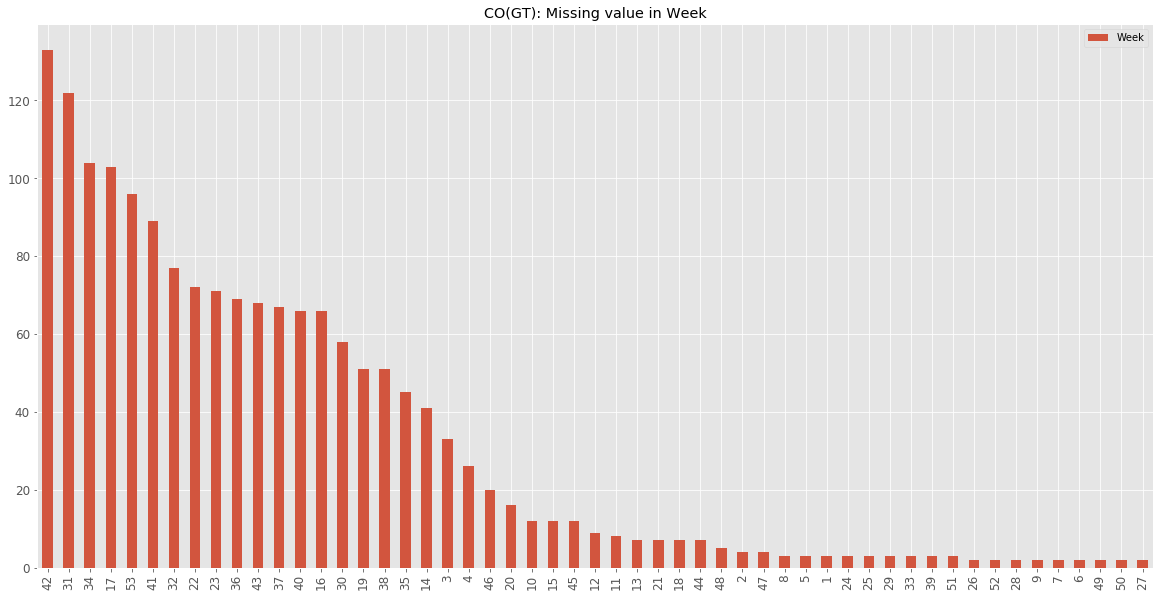

In [163]:
pylab.rcParams['figure.figsize'] = (20, 10) 

df3_missing.Week.value_counts().plot.bar(title = 'CO(GT): Missing value in Week',legend = True, color = '#D2553E')


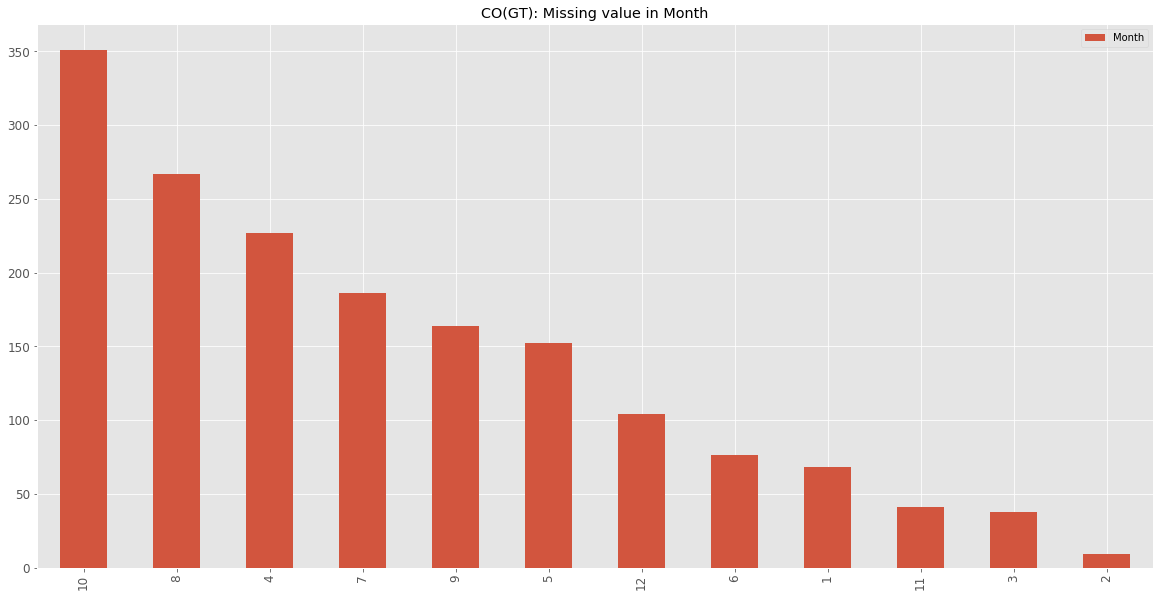

In [164]:
df3_missing.Month.value_counts().plot.bar(title = 'CO(GT): Missing value in Month',legend = True,color = '#D2553E')

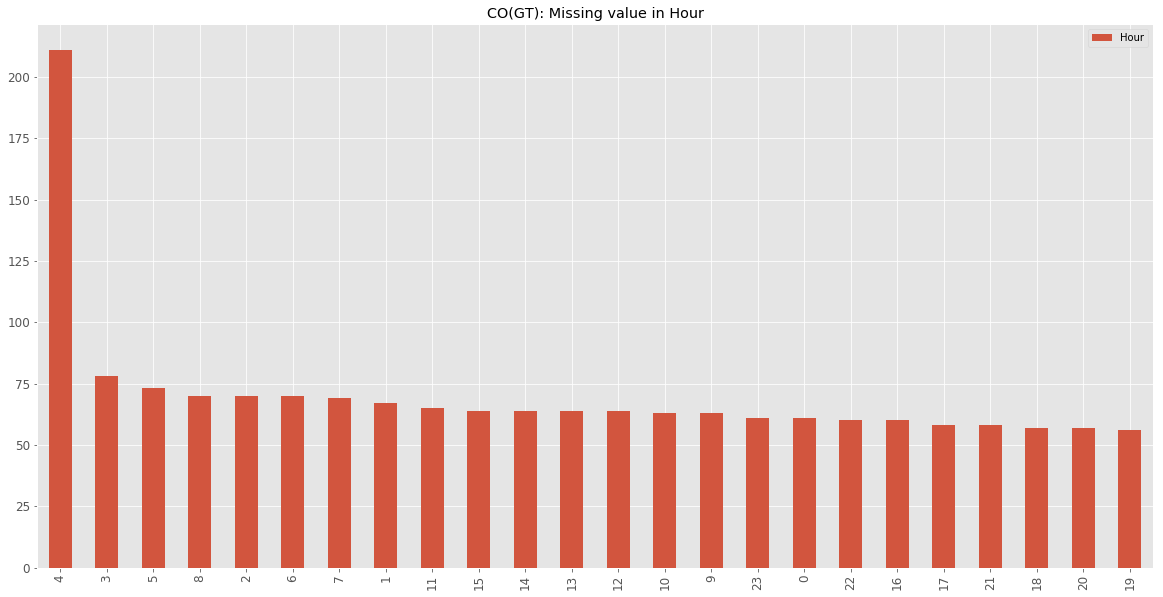

In [165]:
df3_missing.Hour.value_counts().plot.bar(title = 'CO(GT): Missing value in Hour',legend = True,color = '#D2553E')

In [166]:
# df_missing.Month.value_counts().plot.bar(title = 'CO(GT): Missing value in Month')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f761128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1165cb320>]], dtype=object)

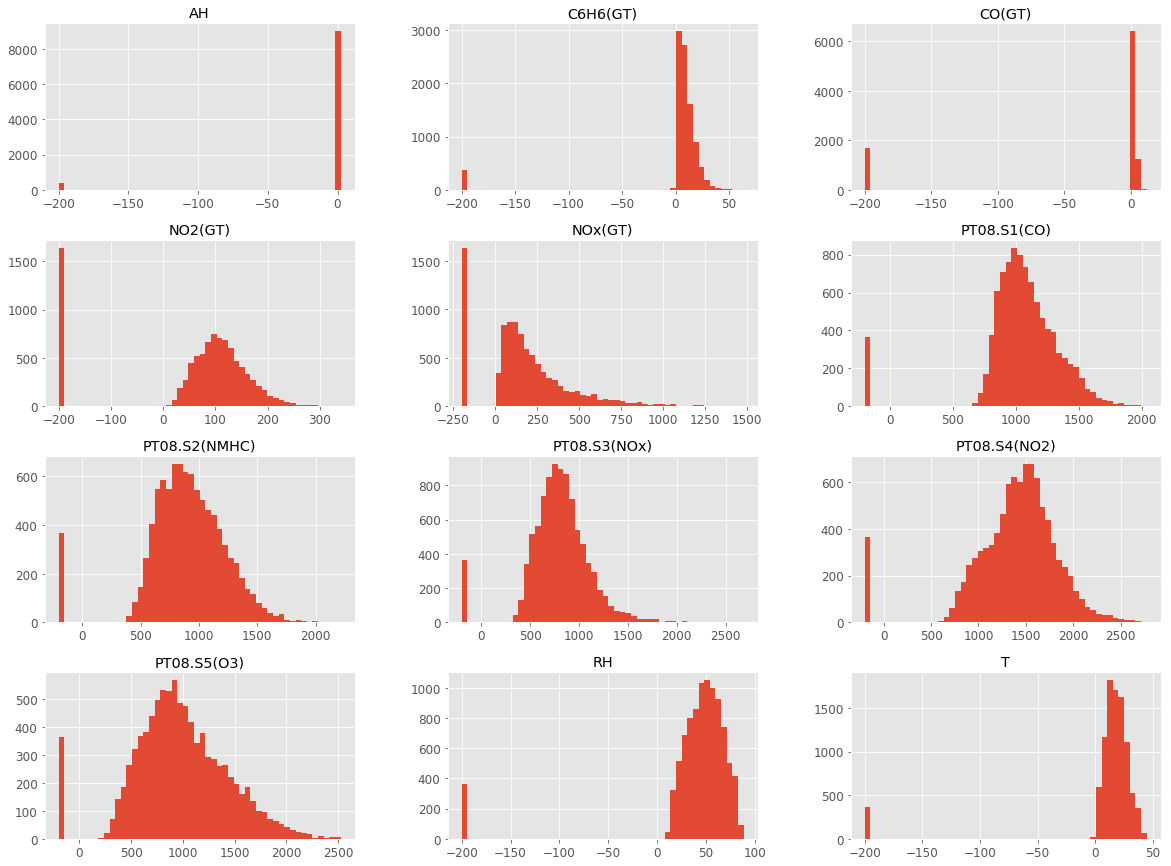

In [167]:
df2 = df
air = df[AQcol]
air.hist(bins=50, figsize=(20,15))

## Histagram Obervations:
- The missing value -200
    1. NMHC has the almost 8000 values of -200. So we'll drop this column
    2. NO2, No4, CO has 1638 entries (17%) of -200. Replace or drop columns?
    3. Other index has about 350 entries (3%) of -200. So we'll replace them

## 遺失值處理

In [168]:
## not include NMHC(GT) 
if 'NMHC(GT)' in df2.columns:
    df2 = df2.drop(['NMHC(GT)'], axis=1)
if 'NMHC(GT)' in AQcol:
    AQcol.remove('NMHC(GT)')

In [169]:
def missing_value_pct(df_name):
    for col in AQcol:
        print(col, ': ', round(df_name[df_name[col] == -200].shape[0]*100/9357) ,'%')
missing_value_pct(df2)

PT08.S1(CO) :  4 %
PT08.S2(NMHC) :  4 %
PT08.S3(NOx) :  4 %
PT08.S4(NO2) :  4 %
PT08.S5(O3) :  4 %
CO(GT) :  18 %
C6H6(GT) :  4 %
NOx(GT) :  18 %
NO2(GT) :  18 %
T :  4 %
RH :  4 %
AH :  4 %


### Dealing with the missing values:
Method: ffill

In [170]:
df2.describe()

,idx,Day,Hour,Weekday,Week,Month,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),CO(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,4678.000000,15.876884,11.498557,4.009939,26.284065,6.310356,1048.990061,894.595276,794.990168,1391.479641,975.072032,-34.207524,1.865683,168.616971,58.148873,9.778305,39.485380,-6.837604
std,2701.277568,8.808653,6.923182,2.000323,15.257919,3.438160,329.832710,342.333252,321.993552,467.210125,456.938184,77.657170,41.380206,257.433866,126.940455,43.203623,51.216145,38.976670
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2339.000000,8.000000,5.000000,2.000000,13.000000,3.000000,921.000000,711.000000,637.000000,1185.000000,700.000000,0.600000,4.000000,50.000000,53.000000,10.900000,34.100000,0.692300
50%,4678.000000,16.000000,11.000000,4.000000,26.000000,6.000000,1053.000000,895.000000,794.000000,1446.000000,942.000000,1.500000,7.900000,141.000000,96.000000,17.200000,48.600000,0.976800
75%,7017.000000,23.000000,18.000000,6.000000,40.000000,9.000000,1221.000000,1105.000000,960.000000,1662.000000,1255.000000,2.600000,13.600000,284.000000,133.000000,24.100000,61.900000,1.296200
max,9356.000000,31.000000,23.000000,7.000000,53.000000,12.000000,2040.000000,2214.000000,2683.000000,2775.000000,2523.000000,11.900000,63.700000,1479.000000,340.000000,44.600000,88.700000,2.231000


In [185]:
## replace every entry has -200 value with it's previous column's value
df2 = df2.replace(-200,'NaN') # replace
df2 = df2.fillna(method='ffill') 
df2[AQcol] = df2[AQcol].astype(float)
# df2.info()

In [186]:
missing_value_pct(df2)
print('Filled all missing values!')

PT08.S1(CO) :  0 %
PT08.S2(NMHC) :  0 %
PT08.S3(NOx) :  0 %
PT08.S4(NO2) :  0 %
PT08.S5(O3) :  0 %
CO(GT) :  0 %
C6H6(GT) :  0 %
NOx(GT) :  0 %
NO2(GT) :  0 %
T :  0 %
RH :  0 %
AH :  0 %
AQI :  0 %
Filled all missing values!


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12616cf28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12498d438>]], dtype=object)

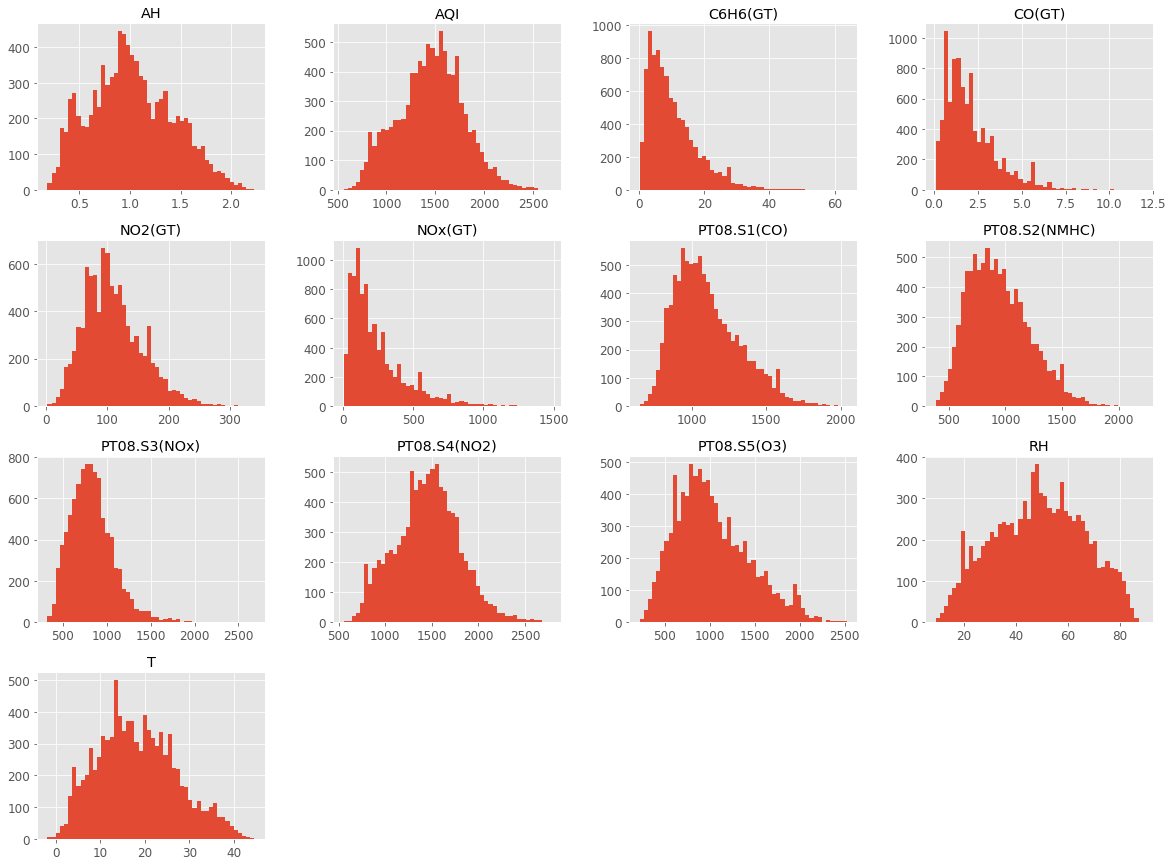

In [187]:
#'After replace missing value'
air = df2[AQcol]
air.hist(bins=50, figsize=(20,15))

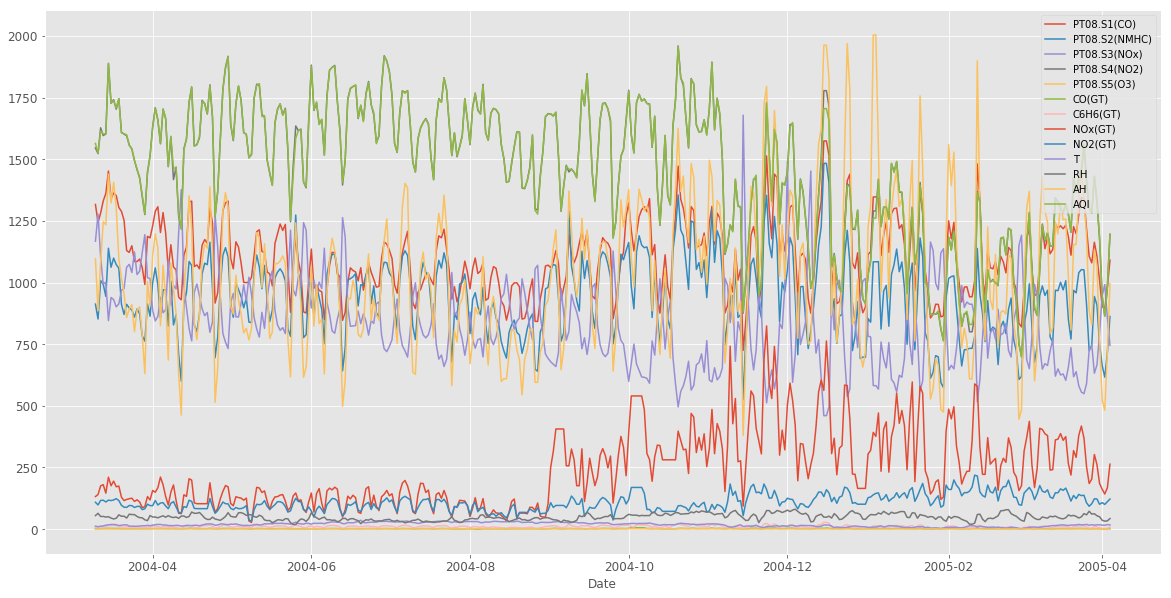

In [188]:
#plot to see values distributions
pylab.rcParams['figure.figsize'] = (20, 10) 
df2.groupby('Date')[AQcol].mean().plot()

In [189]:
center_of_mass = 0.5
def add_hourly_aqi(df, chemical):
    if chemical not in df.columns:
        print('{} no in dataframe!'.format(chemical))
    else:
        df['AQI'] = df[chemical].ewm(min_periods=0,adjust=True,ignore_na=False,com=center_of_mass).mean()

AQcol.append('AQI')

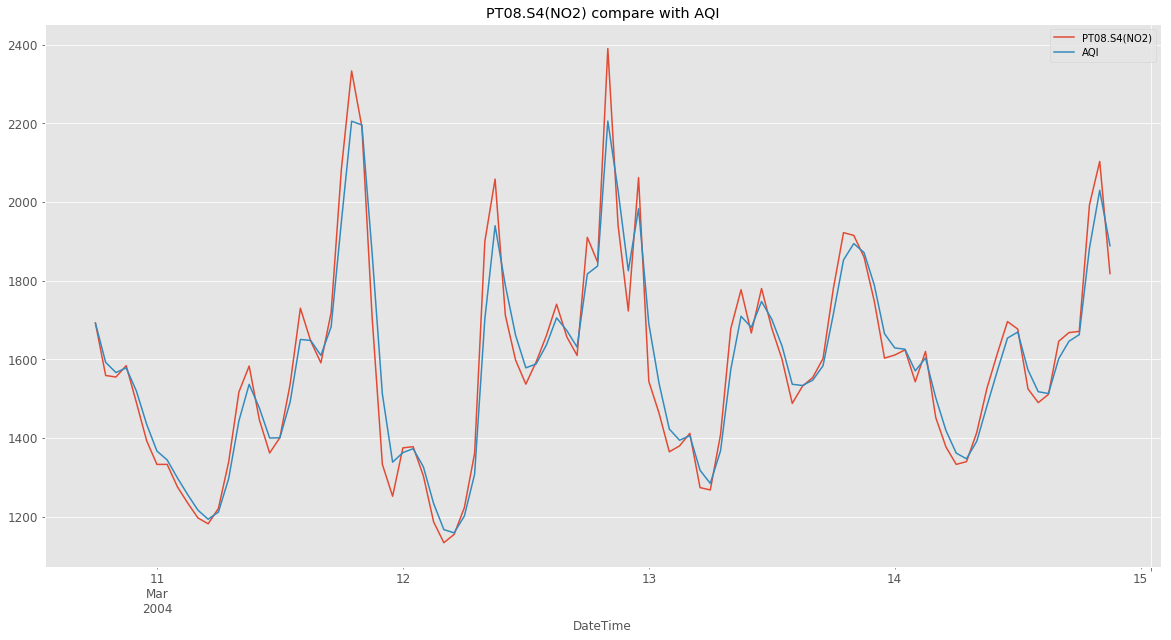

In [190]:
add_hourly_aqi(df2,'PT08.S4(NO2)')
df2[:100]['PT08.S4(NO2)'].plot(legend = True, title ='PT08.S4(NO2) compare with AQI' )
df2[:100]['AQI'].plot(legend = True)

In [191]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 21 columns):
idx              9357 non-null int64
Date             9357 non-null object
Day              9357 non-null int64
Hour             9357 non-null int64
Weekday          9357 non-null int64
Week             9357 non-null int64
Month            9357 non-null int64
PT08.S1(CO)      9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
CO(GT)           9357 non-null float64
C6H6(GT)         9357 non-null float64
NOx(GT)          9357 non-null float64
NO2(GT)          9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
AQI              9357 non-null float64
NO2(GT)_level    9357 non-null int64
dtypes: float64(13), int64(7), object(1)
memory usage

In [192]:
df2.AQI.describe()

count    9357.000000
mean     1453.042890
std       335.227498
min       559.890948
25%      1233.714433
50%      1465.752459
75%      1679.732644
max      2680.313305
Name: AQI, dtype: float64

## Adding diiferent healthy level into df

In [193]:
df3 = df2
df3['NO2(GT)'].describe()

count    9357.000000
mean      109.414877
std        47.221662
min         2.000000
25%        73.000000
50%       102.000000
75%       137.000000
max       340.000000
Name: NO2(GT), dtype: float64

In [220]:
level_dic = {
#     'NO2(GT)': np.array([0,53,100,360,650,1250,1650]),
    'CO(GT)': np.array([4.5,9.5, 12.5, 15.5, 30.5, 40.5])
}



def create_aq_index(row):
    for chem in level_dic:
        return (7-((level_dic[chem] > row[chem]).sum()))

# def my_test2(row):
# return row['a'] % row['c']
# In [54]: df['Value'] = df.apply(my_test2, axis=1)

In [221]:
# df3['NO2(GT)_level'] = df3.apply(create_aq_index, axis=1)
# df3['CO(GT)_level'] = df3.apply(create_aq_index, axis=1)

In [225]:
df3['CO(GT)_level'].value_counts()

1    8610
2     740
3       7
Name: CO(GT)_level, dtype: int64

In [227]:
## save dara
df_clean = df3
df_clean.to_csv('AQdata_clean.csv')
print('AQdata_clean.csv saved!')

AQdata_clean.csv saved!


In [228]:
df3.isna().sum(axis = 0)

idx              0
Date             0
Day              0
Hour             0
Weekday          0
Week             0
Month            0
PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
CO(GT)           0
C6H6(GT)         0
NOx(GT)          0
NO2(GT)          0
T                0
RH               0
AH               0
AQI              0
NO2(GT)_level    0
CO(GT)_level     0
dtype: int64

---
# 以下是工作區
## Investigate missing value distribution
如果有時間繼續改進插值法
順序:
1. 以前一項取代
2. 以上週平均取代
3. 用kNN取代

調查缺值分佈